In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12 guardian - student's guardian (nominal: "mother", "father" or "other")

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

In [50]:
poblacion =  pd.read_csv ('datos/student-por.csv', sep=';')

In [51]:
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [52]:
poblacion.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


No handles with labels found to put in legend.


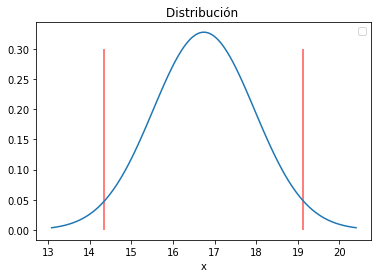

In [80]:
# Instanciar Distribucion
mu = 16.744222
sigma = 1.218138
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
# Agregar estilo
plt.vlines( mu +1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)
plt.vlines( mu -1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)

plt.title("Distribución ")
plt.xlabel("x")
plt.legend()
plt.show()

#Muestreo Aleatorio!
#https://www.surveymonkey.com/mp/sample-size-calculator/
#sigma_muestra=sigma/sqrt(N_muestra)


N=649
alpha=0.95
error=0.05

Desired confidence level	z-score
80%     1.28
85%     1.44
90%     1.65
95%     1.96
99%     2.58

N=242


In [101]:
muestra=poblacion.sample(n =242 ) 
muestra.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,16.747934,2.479339,2.272727,1.586777,1.925620,0.264463,3.983471,3.264463,3.198347,1.500000,2.309917,3.578512,3.954545,11.264463,11.442149,11.706612
std,1.231711,1.127544,1.130490,0.774805,0.821549,0.691004,0.873620,1.044794,1.167469,0.930132,1.271710,1.409818,4.787822,2.855492,3.098447,3.452204
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,26.000000,19.000000,19.000000,19.000000


In [105]:
N_muestra= 242
mediasmuestras = []
for i in range(1000):
    muestra_p = poblacion.sample(n =N_muestra ) 
    mediasmuestras.append(muestra_p.age.values.mean())

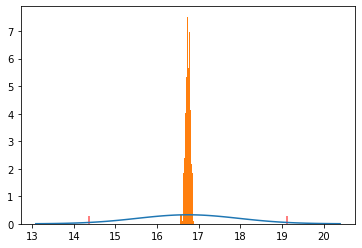

In [107]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(mediasmuestras, bins=50,density=True)
plt.vlines( mu +1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)
plt.vlines( mu -1.96*sigma, 0, 0.3, colors='r', lw=2, alpha=0.5)


In [108]:
# Al iterar un df, se obtienen los nombres de las columnas
for columna inpoblacion:
    
    # Una forma de acccesos a las columnas es como usarlo como un diccionario
    datos_columna = poblacion[columna]
    
    # Cantidad de valores unicos
    distintos = datos_columna.nunique()
    
    print(f"La columna {columna} tiene {distintos} valores diferentes.")

SyntaxError: invalid syntax (<ipython-input-108-b6439f7e1893>, line 2)

In [ ]:
import seaborn as sns

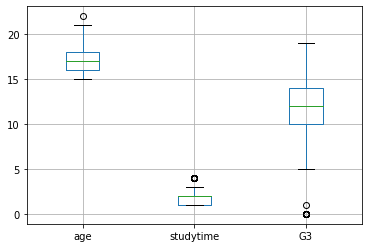

In [109]:

boxplot = poblacion.boxplot(column=['age', 'studytime', 'G3'])

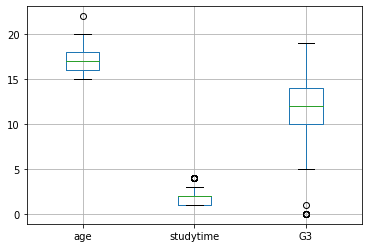

In [110]:

oxplot = muestra.boxplot(column=['age', 'studytime', 'G3'])

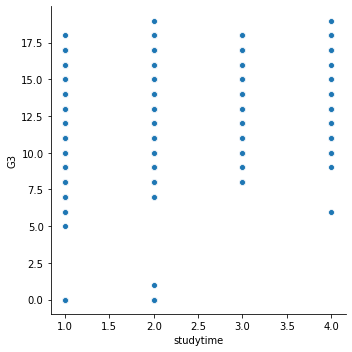

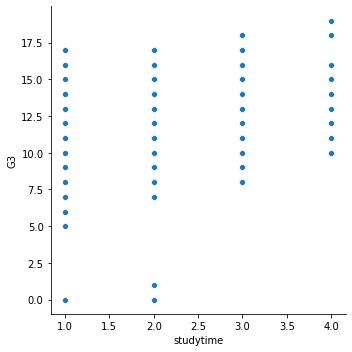

In [111]:
sns.relplot(x="studytime", y="G3", data=datos);
sns.relplot(x="studytime", y="G3", data=muestra);

Text(0, 0.5, 'Frecuencia')

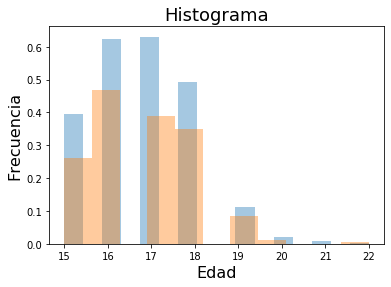

In [112]:
sns.distplot(poblacion["age"], kde=False,norm_hist=True)
sns.distplot(muestra["age"] ,kde=False,norm_hist=True)
plt.title('Histograma', fontsize=18)
plt.xlabel('Edad', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

Text(0, 0.5, 'Frecuencia')

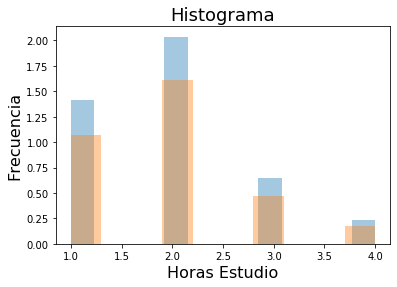

In [116]:
sns.distplot(poblacion["studytime"], kde=False,norm_hist=True)
sns.distplot(muestra["studytime"] ,kde=False,norm_hist=True)
plt.title('Histograma', fontsize=18)
plt.xlabel('Horas Estudio', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

Text(0, 0.5, 'Frecuencia')

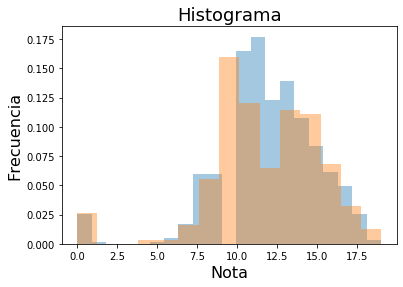

In [117]:
sns.distplot(poblacion["G3"], kde=False,norm_hist=True)
sns.distplot(muestra["G3"] ,kde=False,norm_hist=True)
plt.title('Histograma', fontsize=18)
plt.xlabel('Nota', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

In [118]:
GrupoRural=poblacion["address"]=="R"
GrupoUrbano=poblacion["address"]=="U"

Text(0, 0.5, 'Frecuencia')

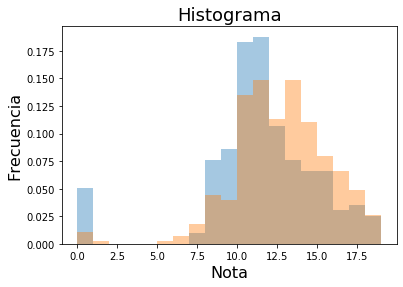

In [119]:
sns.distplot(poblacion["G3"][GrupoRural], kde=False,norm_hist=True)
sns.distplot(poblacion["G3"][GrupoUrbano] ,kde=False,norm_hist=True)
plt.title('Histograma', fontsize=18)
plt.xlabel('Nota', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

Text(0, 0.5, 'Frecuencia')

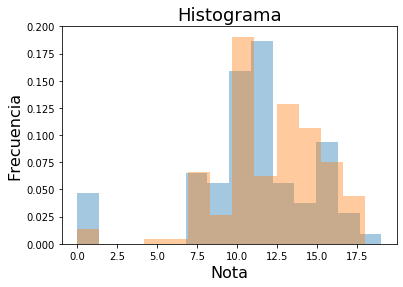

In [120]:
sns.distplot(muestra["G3"][GrupoRural], kde=False,norm_hist=True)
sns.distplot(muestra["G3"][GrupoUrbano] ,kde=False,norm_hist=True)
plt.title('Histograma', fontsize=18)
plt.xlabel('Nota', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)